In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
np.array([train_images[1]])

array([[[[0.60392157, 0.69411765, 0.73333333],
         [0.49411765, 0.5372549 , 0.53333333],
         [0.41176471, 0.40784314, 0.37254902],
         ...,
         [0.35686275, 0.37254902, 0.27843137],
         [0.34117647, 0.35294118, 0.27843137],
         [0.30980392, 0.31764706, 0.2745098 ]],

        [[0.54901961, 0.62745098, 0.6627451 ],
         [0.56862745, 0.6       , 0.60392157],
         [0.49019608, 0.49019608, 0.4627451 ],
         ...,
         [0.37647059, 0.38823529, 0.30588235],
         [0.30196078, 0.31372549, 0.24313725],
         [0.27843137, 0.28627451, 0.23921569]],

        [[0.54901961, 0.60784314, 0.64313725],
         [0.54509804, 0.57254902, 0.58431373],
         [0.45098039, 0.45098039, 0.43921569],
         ...,
         [0.30980392, 0.32156863, 0.25098039],
         [0.26666667, 0.2745098 , 0.21568627],
         [0.2627451 , 0.27058824, 0.21568627]],

        ...,

        [[0.68627451, 0.65490196, 0.65098039],
         [0.61176471, 0.60392157, 0.62745098]

In [ ]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
train_labels[2]

array([9], dtype=uint8)

In [ ]:
train_images[1].shape

(32, 32, 3)

In [ ]:
# verify our data

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

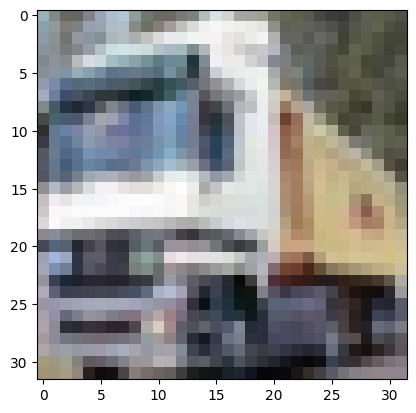

In [ ]:
plt.imshow(train_images[1])

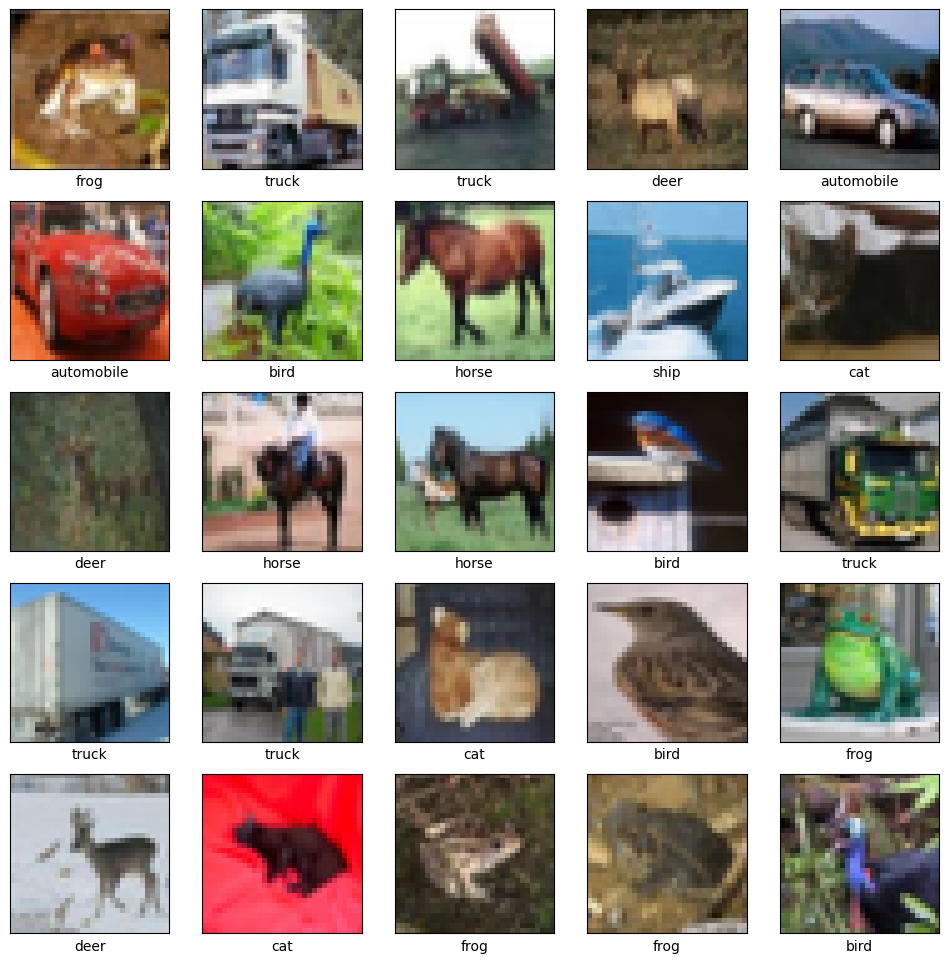

In [ ]:
# lets plot first 25 images
plt.figure(figsize=(12,12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [ ]:
# compile

model.compile(metrics=['accuracy'],
              optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              )

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size = 64,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 6s 6ms/step - loss: 1.5795 - accuracy: 0.4248 - val_loss: 1.3662 - val_accuracy: 0.5143
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2164 - accuracy: 0.5682 - val_loss: 1.0955 - val_accuracy: 0.6103
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 1.0480 - accuracy: 0.6310 - val_loss: 1.1052 - val_accuracy: 0.6163
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.9398 - accuracy: 0.6727 - val_loss: 1.0026 - val_accuracy: 0.6554
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8637 - accuracy: 0.6984 - val_loss: 0.8912 - val_accuracy: 0.6937
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8039 - accuracy: 0.7198 - val_loss: 0.8955 - val_accuracy: 0.6946
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.7521 - accuracy: 0.7374 - val_loss: 0.8870 - val_accuracy: 0.6973

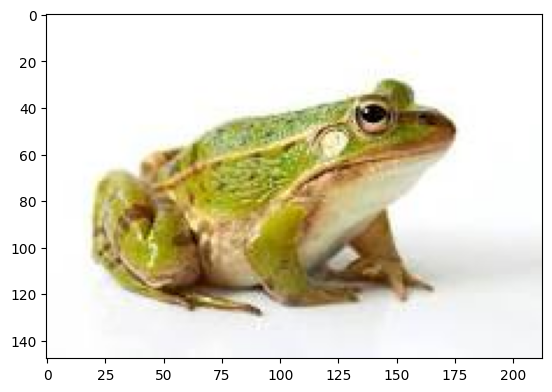

In [ ]:
im1 = plt.imread('/content/frog.jpeg')
plt.imshow(im1)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
image_path = '/content/frog.jpeg'

In [ ]:
image = load_img(image_path, target_size=(32,32))

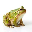

In [ ]:
image

In [ ]:
image_array = img_to_array(image)
image_array

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [245., 246., 248.],
        [244., 245., 247.],
        [245., 246., 248.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [245., 246., 248.],
        [246., 247., 249.],
        [245., 246., 248.]],

       [[253., 253., 253.],
        [254., 254., 254.],
        [254., 2

In [ ]:
image_array = image_array/255.0

In [ ]:
# add a batch dimension

image_array = np.expand_dims(image_array, axis=0)

In [ ]:
image_array.shape

(1, 32, 32, 3)

In [ ]:
prediction = model.predict(image_array)

1/1 [==============================] - 0s 424ms/step


In [ ]:
prediction

array([[-16.615192 , -36.387127 ,   2.6209908,  26.459587 ,  -9.763967 ,
         16.543123 ,  47.349457 , -16.553347 ,  -7.8928156, -15.371259 ]],
      dtype=float32)

In [ ]:
predicted_label = np.argmax(prediction, axis = 1)

In [ ]:
predicted_label

array([6])

In [ ]:
class_names[predicted_label[0]]

'frog'

In [ ]:
model.save('Cfar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded = load_model('Cfar10.h5')